Name:Ammar Zafar

Email:Ammarzafar028@gmail.com

Cell:03316895885


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Normal Distribution

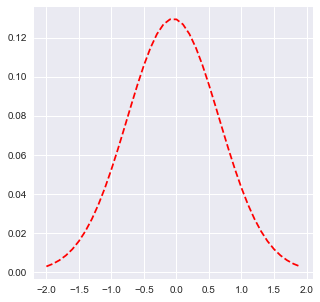

In [2]:
# How to draw normal distribution
def pdf(x):
    mean=np.mean(x)
    std=np.std(x)
    y_output=1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x-mean)**2)/(2*std**2)
    return y_output
# to generate an array of x
x=np.arange(-2,2,0.1)
y=pdf(x)

# plotting the normal curve/bell curve or gaussian distribution

plt.style.use("seaborn")
plt.figure(figsize=(5,5))

plt.plot(x,y, color="red", linestyle="dashed")

## Normal Distribution and its test
1. import dataset
2. subsetting a dataset
3. visualize test for normal distribution
   1. histogram
   2. qq-norm plot
4. Statistical test
   1.    

In [3]:
# Import a dataset
kashti=sns.load_dataset("titanic")
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# taking subsets
kashti=kashti[["sex","age","fare"]]
kashti.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


<AxesSubplot:xlabel='age', ylabel='Count'>

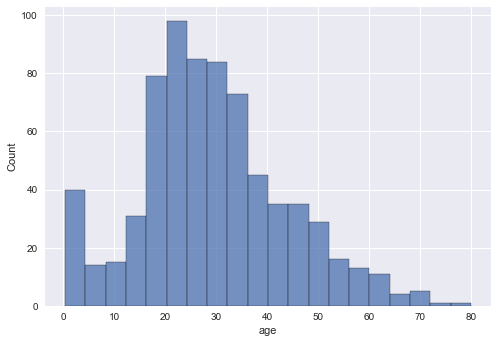

In [5]:
# Histogram plot
sns.histplot(kashti["age"])


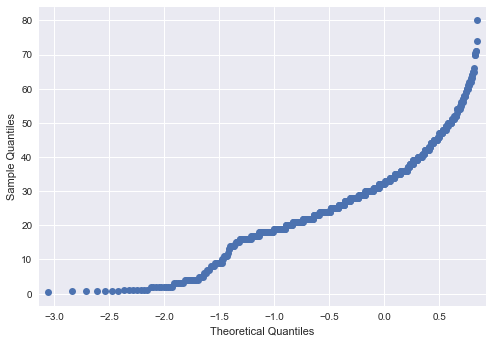

In [6]:
## qq plot
from statsmodels.graphics.gofplots import qqplot

## q-q norm plot
qqplot(kashti["age"])
plt.show()


# 1- Normality Tests

- There are many statsitical tests that we can use to quantify where a sample of data looks as though it was drawn from a gaussian distribution.
- Each test makes different assumptions and considers different aspects of data.
- We will look at 3 commonly used tests in this section that you can apply to your own data samples.

1. Shapiro wilk test
2. D 'Agostion's k^2 Test
3. Anderson-Darling test

- p<= alpha:reject HO,not normal
- p>=alpha:fail to reject Ho,normal.

# 1- Shapiro Wilk Test

- The Shapiro wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

- In practice,The shapiro wilk test is beleived to be a reliable test of normality,although there is some suggestion that the test may be suitable for smaller samples of data, e.g thousands of observations or fewer.

- The shapiro scipy function will calculate the shapiro will on a given data set.The function returns both the W-statistic calculated by test and p-value.

 Assumptions

- observations in each sample are independent and identically distributed.

 Interpretation

- HO:the sample has a Gaussian distribution
- H1:the sample doesnot have a Gaussian Distribution





In [7]:
# Shapiro wilk test
from scipy.stats import shapiro

stat, p=shapiro(kashti["age"])
print('stat=%.3f, p=%.3f' % (stat,p))

# make a conditional argument for further use
if p>0.05:
    print("probably Gaussian or normal distribution")
else:
    print("probably not Gaussian nor normal distribution")

stat=nan, p=1.000
probably Gaussian or normal distribution


# D 'Agostion's k^2 Test

The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.

Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value. Assumptions

Observations in each sample are independent and identically distributed.
Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [8]:

from scipy.stats import normaltest

stat, p=normaltest(kashti["age"])
print('stat=%.3f, p=%.3f' % (stat,p))

# make a conditional argument for further use
if p>0.05:
    print("probably Gaussian or normal distribution")
else:
    print("probably not Gaussian nor normal distribution")

stat=nan, p=nan
probably not Gaussian nor normal distribution


# Anderson Darling test

A statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

Assumptions

Observations in each sample are independent and identically distributed.
Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [ ]:
from scipy.stats import anderson

# select a column to check the normal distribution
result=anderson(kashti["age"])
print("stat=%.3f" % (result.statistic))
for i in range(len(result.critical_values)):
    sl,cv=result.significance_level[i],result.critical_values[i]
    if result.statistic < cv:
        print("Probably Gaussian/Normal Distribution at the %.if%% level" % (sl))
    else:
        print("Probably not Gaussian/Normal Distribution at the %.if%% level" % (sl))

